In [31]:
from pulp import *
import cvxpy as cp
import pandas as pd
import time
from tabulate import tabulate
from matplotlib import pyplot as plt

In [32]:
def get_points(file_name):
    x_values, y_values = [], []
    points = []
    
    with open(file_name) as file:
        lines = file.readlines()
        
    for line in lines:
        a, b = map(float, line.rstrip().split(","))
        x_values.append(a)
        y_values.append(b)
        points.append([a, b])
    
    return x_values, y_values, points

In [33]:
def manhattan_distance_1(data):
    start_time = time.process_time()
            
    # Initialize
    prob = LpProblem("ManhattanDistance1", LpMinimize)

    # Decision Variables
    x = LpVariable.dicts("x", range(len(data) + 1), lowBound=0) # x coords
    y = LpVariable.dicts("y", range(len(data) + 1), lowBound=0) # y coords

    # Objective Function
    prob += lpSum([x[i] + y[i] for i in range(1,len(data)+1)])

    # Constraints 
    for i, line in enumerate(data):
        a, b = line
        prob += x[0] - a <= x[i + 1]
        prob += a - x[0] <= x[i + 1]
        prob += y[0] - b <= y[i + 1]
        prob += b - y[0] <= y[i + 1]
        
    end_time = time.process_time()
    ptime = end_time - start_time
    prob.solve()
    
    return value(prob.objective), x[0].varValue, y[0].varValue, ptime

In [34]:
def manhattan_distance_2(data):
    start_time = time.process_time()
        
    # Initialization
    prob = LpProblem("Manhattan_Distance_2", LpMinimize)
    
    # Decision Variables
    x = LpVariable("x", 0)
    y = LpVariable("y", 0)
    tp = LpVariable.dicts("tpos", range(1, len(data) + 1), lowBound=0) # + t's
    tn = LpVariable.dicts("tneg", range(1, len(data) + 1), lowBound=0) # - t's
    hp = LpVariable.dicts("hpos", range(1, len(data) + 1), lowBound=0) # + h's
    hn = LpVariable.dicts("hneg", range(1, len(data) + 1), lowBound=0) # - h's
    
    # Objective Function
    prob += lpSum([tp[i] + tn[i] + hp[i] + hn[i] for i in range(1, len(data) + 1)])
    
    # Constraints
    for i, line in enumerate(data):
        a, b = line
        prob += x - a == tp[i+1] - tn[i+1]
        prob += y - b == hp[i+1] - hn[i+1]
        
    end_time = time.process_time()
    ptime = end_time - start_time
    prob.solve()
    
    return value(prob.objective), x.varValue, y.varValue, ptime

In [35]:
def euclidian_distance(data):
    start_time = time.process_time()

    x = cp.Variable()
    y = cp.Variable()

    obj_function = []

    for line in data:
        a, b = line
        obj_function.extend([cp.abs(x-a), cp.abs(y-b)])
        
    constraints = []

    obj = cp.Minimize(sum(obj_function))

    prob = cp.Problem(obj, constraints)
    
    end_time = time.process_time()
    ptime = end_time - start_time
        
    return prob.solve(), x.value, y.value, ptime

In [36]:
files = ["HW1_2022402150_case_1.txt", "HW1_2022402150_case_2.txt", "HW1_2022402150_case_3.txt"]

data_frames = []
data_x = []
data_y = []

for file_name in files:
    x_values, y_values, data = get_points(file_name)
    status1, x1, y1, time1 = manhattan_distance_1(data)
    status2, x2, y2, time2 = manhattan_distance_2(data)
    status3, x3, y3, time3 = euclidian_distance(data)

    df = pd.DataFrame({
        "n = 10": ["Task 1", "Task 2", "Task 3"],
        "z*": [status1, status2, status3],
        "x*": [x1, x2, x3],
        "y*": [y1, y2, y3],
        "Runtime": [time1, time2, time3]
    })

    data_frames.append(df.set_index("n = 10"))
    data_x.append(x_values)
    data_y.append(y_values)

c:\Users\yusuf\VSCode\201TermProject\.venv\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
c:\Users\yusuf\VSCode\201TermProject\.venv\Lib\site-packages\cvxpy\problems\problem.py:158: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "


In [37]:
# First Case 

print(tabulate(data_frames[0], headers="keys", tablefmt="grid"))


+----------+---------+---------+---------+-----------+
| n = 10   |      z* |      x* |      y* |   Runtime |
+==========+=========+=========+=========+===========+
| Task 1   | 49027.1 | 212.716 | 625.391 |         0 |
+----------+---------+---------+---------+-----------+
| Task 2   | 49027.1 | 212.716 | 625.391 |         0 |
+----------+---------+---------+---------+-----------+
| Task 3   | 49027.1 | 262.321 | 625.955 |         0 |
+----------+---------+---------+---------+-----------+


General expression of number of variables: 2*(n+1)

General expression of number of contraints: 4*n 

! n is the number of lines in the data file

Task 1

Number of Variables: 2*(100+1)= 202

Number of Contraints: 4*100 = 400

Task 2

Number of Variables: 2*(1000+1) = 2002

Number of Contraints: 4*1000 = 4000

Task 3

Number of Variables: 2*(10000+1) = 20002

Number of Contraints: 4*10000 = 40000

It can be seen that linear variables and contraints isn't a halt for the algorithm, even in the case of increasing number of variables and constraints, algorithm can handle with ease because of everything is linear

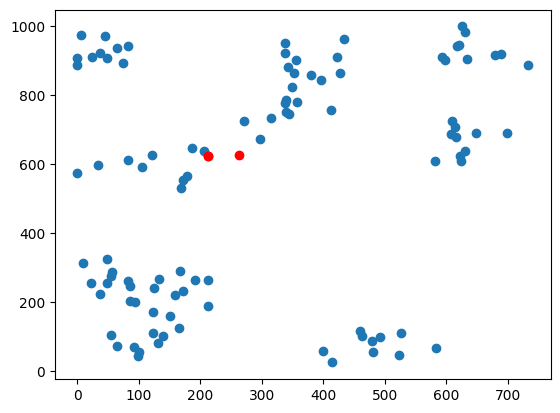

In [38]:
# First Case Plot

plt.scatter(data_x[0], data_y[0])
plt.scatter(data_frames[0]["x*"], data_frames[0]["y*"], color='red', label='Highlighted Point')
plt.show()

Red dots are different optimal values for each task (optimal facility location)

Blue dots are data points (customer locations)

There may be multiple number of optimal locations because of the nature of interior point search methods

In [39]:
# Second Case 

print(tabulate(data_frames[1], headers="keys", tablefmt="grid"))

+----------+--------+---------+---------+-----------+
| n = 10   |     z* |      x* |      y* |   Runtime |
+==========+========+=========+=========+===========+
| Task 1   | 511444 | 265.4   | 716.95  |   0       |
+----------+--------+---------+---------+-----------+
| Task 2   | 511444 | 265.279 | 716.95  |   0.03125 |
+----------+--------+---------+---------+-----------+
| Task 3   | 511444 | 265.352 | 717.097 |   0.09375 |
+----------+--------+---------+---------+-----------+


General expression of number of variables: 4*n + 2

General expression of number of contraints: 2*n

! n is the number of lines in the data file

Task 1

Number of Variables: 4*100 + 2 =  402

Number of Contraints: 2*100 = 200

Task 2

Number of Variables: 4*1000 + 2 = 4002

Number of Contraints: 2*1000 = 2000

Task 3

Number of Variables: 4*10000 + 2 = 40002

Number of Contraints: 2*10000 = 20000

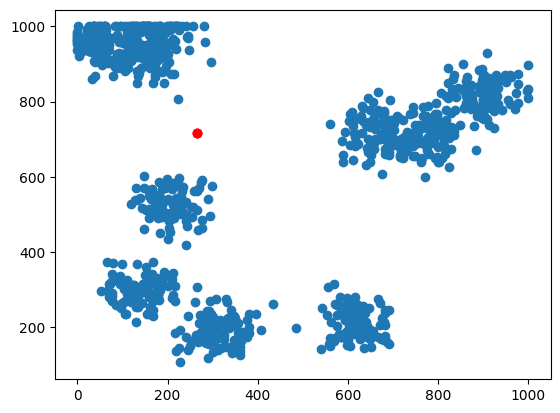

In [40]:
# Second Casew Plot

plt.scatter(data_x[1], data_y[1])
plt.scatter(data_frames[1]["x*"], data_frames[1]["y*"], color='red', label='Highlighted Point')
plt.show()

Red dots are different optimal values for each task (optimal facility location)

Blue dots are data points (customer locations)

There may be multiple number of optimal locations because of the nature of interior point search methods

In [41]:
# Third Case 

print(tabulate(data_frames[2], headers="keys", tablefmt="grid"))

+----------+-------------+---------+---------+-----------+
| n = 10   |          z* |      x* |      y* |   Runtime |
+==========+=============+=========+=========+===========+
| Task 1   | 5.22738e+06 | 694.028 | 523.944 |  0.265625 |
+----------+-------------+---------+---------+-----------+
| Task 2   | 5.22738e+06 | 694.028 | 523.944 |  0.171875 |
+----------+-------------+---------+---------+-----------+
| Task 3   | 5.22738e+06 | 694.008 | 523.847 |  2.25     |
+----------+-------------+---------+---------+-----------+


General expression of number of variables: 2

General expression of number of contraints: 0 

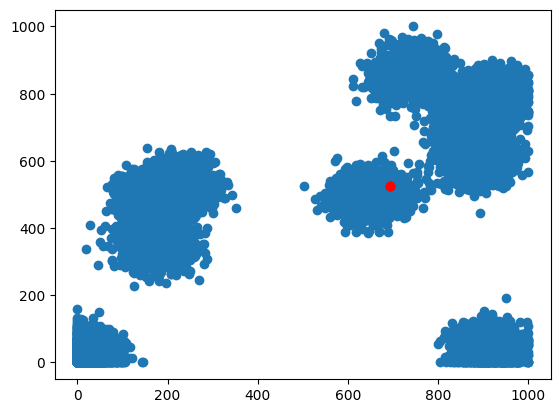

In [42]:
# Third Case Plot

plt.scatter(data_x[2], data_y[2])
plt.scatter(data_frames[2]["x*"], data_frames[2]["y*"], color='red', label='Highlighted Point')
plt.show()

Red dots are different optimal values for each task (optimal facility location)

Blue dots are data points (customer locations)

There may be multiple number of optimal locations because of the nature of interior point search methods

Analysis between Case 1 and Case 2

It can be seen that Case 1 has more constraints than Case 2, however  the record of having more variables belongs to Case 2. Because of this little difference that rooted from formulation of the problem, runtimes may differ thus tells us which formulation is more algorithm friendly. In the base of each Task, it can be observed that CPU runtime of Case 2 is always longer than Case 1 and by the fact of this, a conclusion of more constraints cause a bigger halt to computer can be made. Thus if there are alternative formulations, one with the least variables has more efficient running capacity


Analysis between Cases 1-2 and Case 3

With a little observing, Case 3's runtime lenght dominates in each task. One can conclude that this is because of the algorithms that are in use: the algorithm of Case 3 is using the interior point method which is somewhat longer to converge in a close approximation because of the infinite number of points it has to visit. On the other hand, Case 1-2 utilizes an algorithm that uses corner point method which visits countably finite number of columns thus converges way faster than any interior-point method. 